# Key Insights Analysis

This notebook explores key insights from the NYC 311 dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("/workspaces/nyc-311-ops-analysis/data/raw/311.csv")
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')

# Calculate resolution hours
df['resolution_hours'] = (df['closed_date'] - df['created_date']).dt.total_seconds() / 3600

print(f"Loaded {len(df):,} records")

Loaded 110,045 records


## Trend of Total Requests Over Time

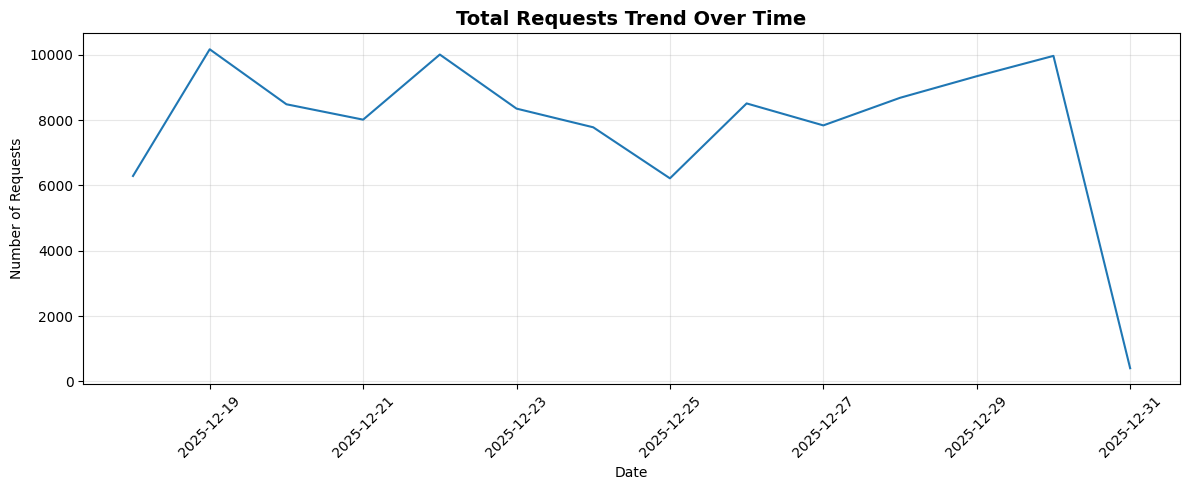

In [3]:
# Aggregate by date
daily_requests = df.groupby(df['created_date'].dt.date).size().reset_index(name='requests')
daily_requests = daily_requests.sort_values('created_date')

plt.figure(figsize=(12, 5))
plt.plot(daily_requests['created_date'], daily_requests['requests'], linewidth=1.5)
plt.title('Total Requests Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Top Complaint Types

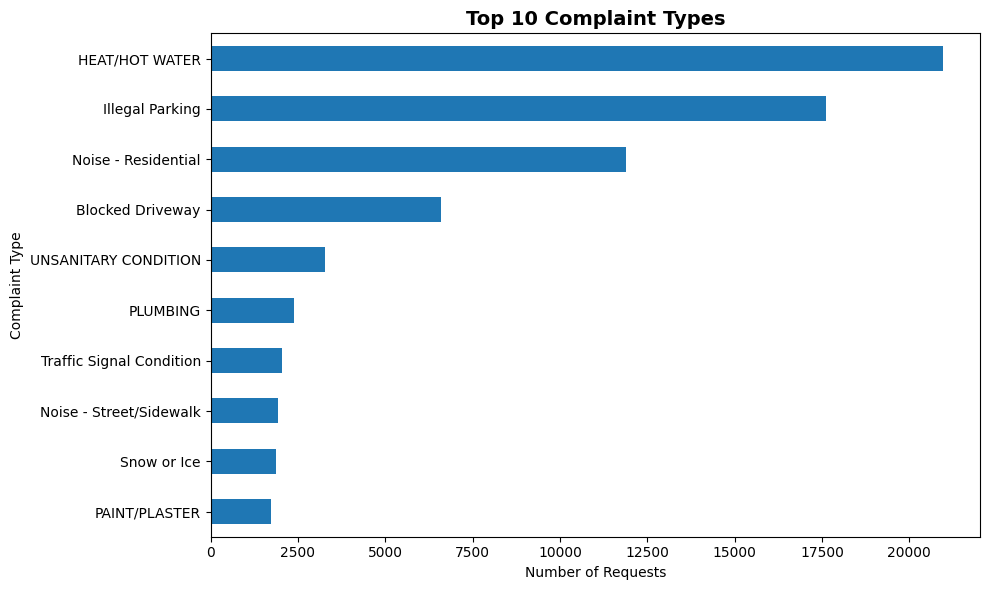


Top 10 Complaint Types:
complaint_type
HEAT/HOT WATER              20977
Illegal Parking             17606
Noise - Residential         11879
Blocked Driveway             6594
UNSANITARY CONDITION         3281
PLUMBING                     2401
Traffic Signal Condition     2034
Noise - Street/Sidewalk      1930
Snow or Ice                  1878
PAINT/PLASTER                1742
Name: count, dtype: int64


In [4]:
# Top 10 complaint types
top_complaints = df['complaint_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_complaints.plot(kind='barh')
plt.title('Top 10 Complaint Types', fontsize=14, fontweight='bold')
plt.xlabel('Number of Requests')
plt.ylabel('Complaint Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Complaint Types:")
print(top_complaints)

## Borough Differences

Borough Comparison:
               Total Requests  Avg Resolution Hours  Median Resolution Hours
borough                                                                     
BROOKLYN                33552             22.020960                 3.478611
QUEENS                  27079             17.761890                 2.623194
BRONX                   24177             28.213111                 9.133333
MANHATTAN               21183             25.113144                 4.235000
STATEN ISLAND            3982             22.671213                 3.807222
Unspecified                72             30.144714                16.633333


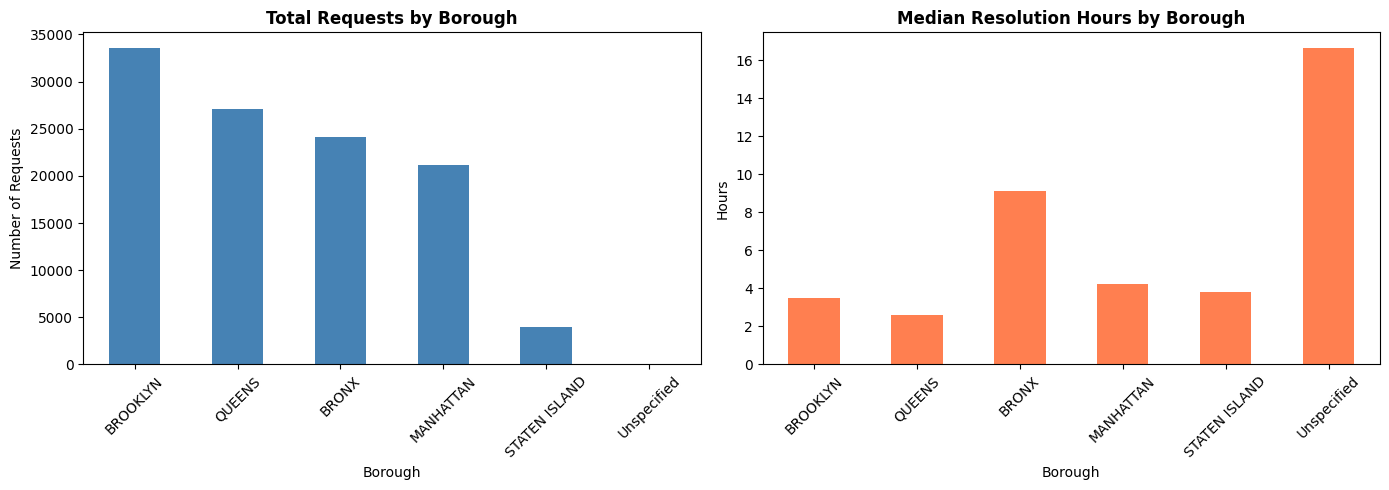

In [5]:
# Borough comparison
borough_stats = pd.DataFrame({
    'Total Requests': df['borough'].value_counts(),
    'Avg Resolution Hours': df.groupby('borough')['resolution_hours'].mean(),
    'Median Resolution Hours': df.groupby('borough')['resolution_hours'].median()
})
borough_stats = borough_stats.sort_values('Total Requests', ascending=False)

print("Borough Comparison:")
print(borough_stats.to_string())

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

borough_stats['Total Requests'].plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Total Requests by Borough', fontweight='bold')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Requests')
ax1.tick_params(axis='x', rotation=45)

borough_stats['Median Resolution Hours'].plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Median Resolution Hours by Borough', fontweight='bold')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Hours')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Resolution Time Distribution

Closed requests: 86,213
Mean resolution time: 22.82 hours
Median resolution time: 3.82 hours
90th percentile: 69.65 hours


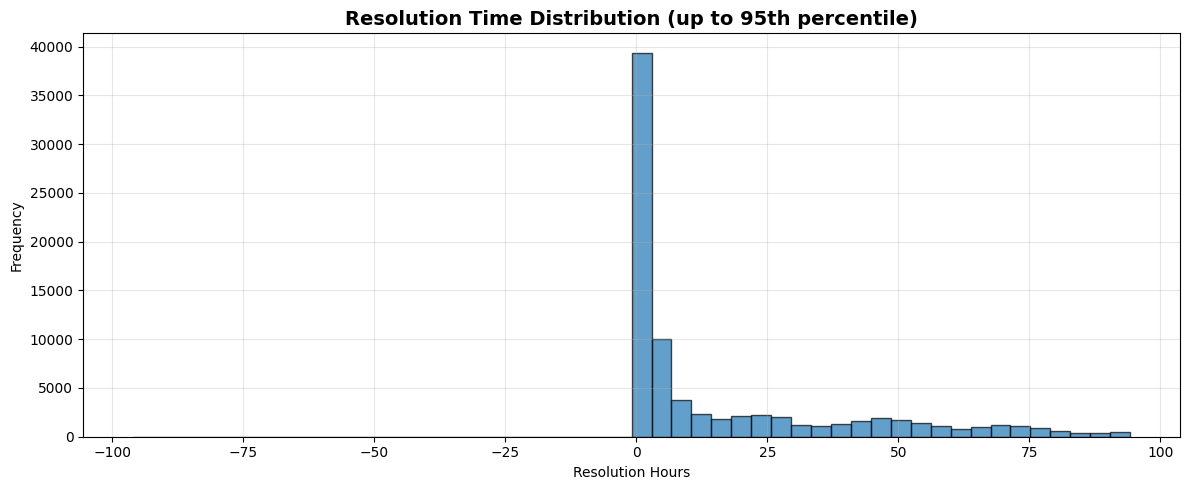

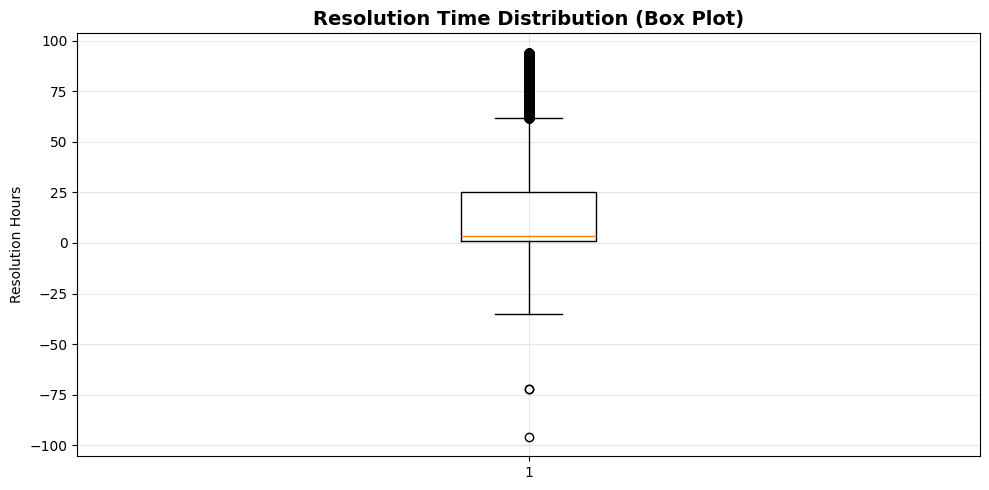

In [6]:
# Filter to closed requests only
closed_df = df[df['closed_date'].notna()].copy()
closed_resolution = closed_df['resolution_hours'].dropna()

print(f"Closed requests: {len(closed_resolution):,}")
print(f"Mean resolution time: {closed_resolution.mean():.2f} hours")
print(f"Median resolution time: {closed_resolution.median():.2f} hours")
print(f"90th percentile: {closed_resolution.quantile(0.9):.2f} hours")

# Histogram
plt.figure(figsize=(12, 5))
plt.hist(closed_resolution[closed_resolution <= closed_resolution.quantile(0.95)], 
         bins=50, edgecolor='black', alpha=0.7)
plt.title('Resolution Time Distribution (up to 95th percentile)', fontsize=14, fontweight='bold')
plt.xlabel('Resolution Hours')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(10, 5))
plt.boxplot(closed_resolution[closed_resolution <= closed_resolution.quantile(0.95)], 
           vert=True)
plt.title('Resolution Time Distribution (Box Plot)', fontsize=14, fontweight='bold')
plt.ylabel('Resolution Hours')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()